In [3]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # display figure inline in notebook
#import plotly.express as px # view the timeseries data in a slider
import seaborn as sns
#sns.set(rc={'figure.figsize':(8,5)}) # set the seaborn default figrue size
sns.set()
sns.set_style('white') #possible choices: white, dark, whitegrid, darkgrid, ticks
sns.set(rc={'figure.figsize':(11,7)}, style="white", font_scale=1.4)#style="whitegrid"
#plt.rcParams["axes.labelsize"] = 16

params = {'legend.fontsize': 17,
          'legend.handlelength': 2,
         'axes.labelsize': 'large'}
plt.rcParams.update(params)

from datetime import datetime # converting the timestamp data into datetime object

In [4]:
# loading the saved file

SAVING_DIR = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\outputs\Vizualization'

DATA_DIR = r'C:\Users\Rabbil\Documents\BDA_thesis\thesis-project\data\processed\merged_data.csv'
data = pd.read_csv(DATA_DIR) 
data.head(5)

,date,spora-id,latitude,longitude,NO,NO2,O3,CO,pressure,humidity,temp,NO_s,NO2_s,O3_s,CO_s
0,2019-02-19 07:34:09,2,60.184558,24.922632,0.341640,-0.036944,-0.078952,0.057486,100259.0,27.889,30.55,-0.135450,0.096417,0.066185,-0.256680
1,2019-02-19 07:34:10,2,60.184562,24.922633,0.334240,-0.042720,-0.078938,0.057486,100259.0,27.886,30.56,-0.141582,0.094251,0.066201,-0.233120
2,2019-02-19 07:34:11,2,60.184563,24.922632,0.334024,-0.040896,-0.078902,0.019564,100260.0,27.876,30.56,-0.149044,0.094080,0.066187,-0.167245
3,2019-02-19 07:34:12,2,60.184563,24.922638,0.334024,-0.041360,-0.079088,0.019564,100261.0,27.876,30.57,-0.130382,0.094080,0.066209,-0.167245
4,2019-02-19 07:34:13,2,60.184562,24.922643,0.320968,-0.039488,-0.079233,0.172190,100260.0,27.871,30.57,-0.130382,0.099758,0.066233,-0.158410


In [5]:
def data_info(df):
    print('Numver of Rows :', df.shape[0])
    print('Number of Columns :', df.shape[1])
    print('\nFeatures : \n', df.columns.tolist())
    print('\nMissing values counts :\n', df.isnull().sum())
    print('\nUnique values counts : \n', df.nunique())
    print('percentage of null value : \n',df.isnull().sum()/len(df))
    cols=['NO', 'NO2', 'O3', 'CO', 'pressure', 'humidity', 'temp', 'NO_s', 'NO2_s', 'O3_s', 'CO_s']
    print('percentage of negative value: \n', df[df[cols]<0].count()/len(df))

In [6]:
basic_insight = data_info(data)
print(basic_insight)

Numver of Rows : 6052856
Number of Columns : 15

Features : 
 ['date', 'spora-id', 'latitude', 'longitude', 'NO', 'NO2', 'O3', 'CO', 'pressure', 'humidity', 'temp', 'NO_s', 'NO2_s', 'O3_s', 'CO_s']

Missing values counts :
 date               0
spora-id           0
latitude           0
longitude          0
NO            957820
NO2           957828
O3            984996
CO           1066577
pressure           0
humidity           0
temp               0
NO_s         3405046
NO2_s        3405043
O3_s         3405109
CO_s         3405218
dtype: int64

Unique values counts : 
 date         4701667
spora-id           3
latitude       41568
longitude      63687
NO           1189907
NO2          1511894
O3           1073374
CO            619331
pressure        6565
humidity       54721
temp            4845
NO_s          450332
NO2_s         472279
O3_s          840071
CO_s           55411
dtype: int64
percentage of null value : 
 date         0.000000
spora-id     0.000000
latitude     0.000000

In [9]:
# Printing summary statistics

def summary_statistics(df):

    desc = df.describe()
    desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
    desc.iloc[1:] = desc.iloc[1:].applymap('{:.2f}'.format)
    desc = desc.append(df.reindex(desc.columns, axis=1).agg(['skew', 'kurt']))
    
    # saving the statistics
    my_path = SAVING_DIR
    my_file = 'summary_statistics.xlsx'
    desc.to_excel(os.path.join(my_path, my_file))
    
    return desc

In [12]:
#pip install openpyxl

In [11]:
summary = summary_statistics(data)
summary

,spora-id,latitude,longitude,NO,NO2,O3,CO,pressure,humidity,temp,NO_s,NO2_s,O3_s,CO_s
count,6052856,6052856,6052856,5095036,5095028,5067860,4986279,6052856,6052856,6052856,2647810,2647813,2647747,2647638
mean,2.18,56.86,23.56,1.12,0.08,0.04,0.08,101577.02,22.68,25.75,-0.20,0.11,0.03,-0.73
std,0.68,13.74,5.69,3.42,1.39,0.21,17.78,1327.14,8.52,8.08,1.14,0.79,0.08,5.74
min,1.00,0.00,0.00,-9.62,-7.74,-9.38,-13.78,97668.00,8.51,3.02,-3.00,-3.00,-0.16,-4.34
25%,2.00,60.17,24.92,-1.26,-0.54,-0.08,-3.42,100679.00,16.95,19.73,-0.90,-0.47,-0.02,-1.47
50%,2.00,60.18,24.93,0.14,-0.01,0.03,-0.41,101687.00,20.56,25.39,-0.13,-0.11,0.05,-0.66
75%,3.00,60.19,24.95,3.09,0.49,0.14,0.35,102645.00,25.86,31.12,0.50,0.77,0.09,-0.39
max,3.00,60.23,24.99,56.63,8.49,8.71,1036.75,104266.00,85.14,51.46,13.84,2.10,1.42,279.04
skew,-0.228503,-3.89521,-3.89514,1.72292,1.47784,0.493397,36.7347,-0.472511,1.58111,0.223709,-0.142516,0.49361,-0.553339,46.7882
kurt,-0.839961,13.1727,13.1723,5.36425,5.72275,9.50043,1856.62,-0.382219,3.23043,-0.116815,-0.247747,-0.693997,-0.328466,2257.4


In [25]:
# function for plotting the features/variables level

def plot_pollutant_concentrations(df):
    
    cols_plot = ['NO', 'NO2', 'O3', 'CO']
    df.set_index('date')[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True, legend=True, figsize=(12,8))
    
    my_path = SAVING_DIR
    my_file = 'raw_pollutant_concentration_level.png'
    plt.savefig(os.path.join(my_path, my_file))
    

def plot_metorological_concentrations(df):
    
    cols_plot = ['pressure', 'humidity', 'temp']
    df.set_index('date')[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True, legend=True, figsize=(12,8))
    
    my_path = SAVING_DIR
    my_file = 'raw_metorolgical_concentration_level.png'
    plt.savefig(os.path.join(my_path, my_file))
    



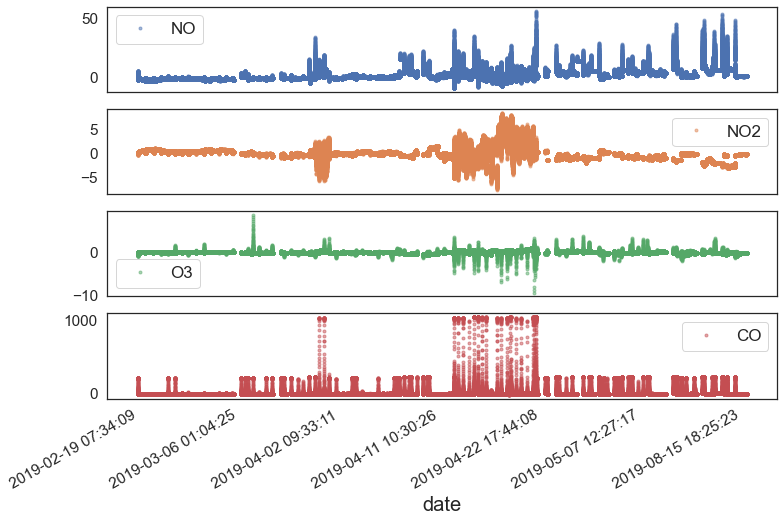

In [26]:
plot_pollutant_concentrations(data)

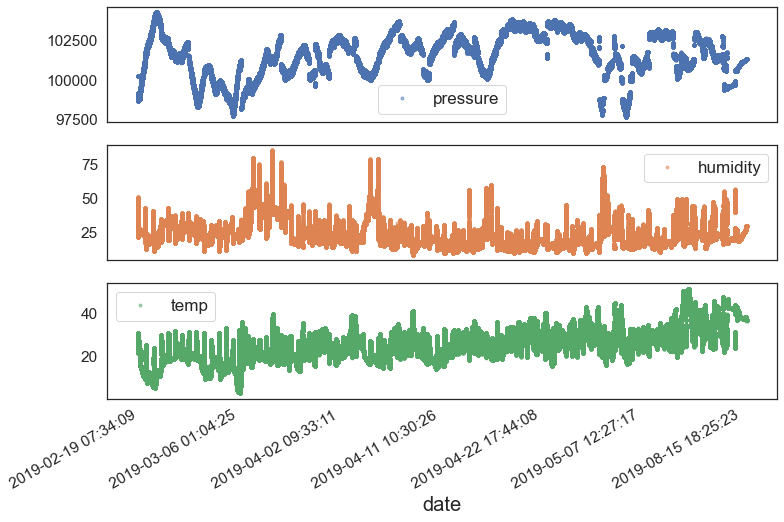

In [27]:
plot_metorological_concentrations(data)